In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import polars as pl
from functions.eda import *
from functions.cat_eda import *
from functions.num_eda import *

In [2]:
data=pl.read_csv("CarPrice_Assignment.csv").drop(["car_ID","CarName"])
data

symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
i64,str,str,str,str,str,str,f64,f64,f64,f64,i64,str,str,i64,str,f64,f64,f64,i64,i64,i64,i64,f64
3,"""gas""","""std""","""two""","""convertible""","""rwd""","""front""",88.6,168.8,64.1,48.8,2548,"""dohc""","""four""",130,"""mpfi""",3.47,2.68,9.0,111,5000,21,27,13495.0
3,"""gas""","""std""","""two""","""convertible""","""rwd""","""front""",88.6,168.8,64.1,48.8,2548,"""dohc""","""four""",130,"""mpfi""",3.47,2.68,9.0,111,5000,21,27,16500.0
1,"""gas""","""std""","""two""","""hatchback""","""rwd""","""front""",94.5,171.2,65.5,52.4,2823,"""ohcv""","""six""",152,"""mpfi""",2.68,3.47,9.0,154,5000,19,26,16500.0
2,"""gas""","""std""","""four""","""sedan""","""fwd""","""front""",99.8,176.6,66.2,54.3,2337,"""ohc""","""four""",109,"""mpfi""",3.19,3.4,10.0,102,5500,24,30,13950.0
2,"""gas""","""std""","""four""","""sedan""","""4wd""","""front""",99.4,176.6,66.4,54.3,2824,"""ohc""","""five""",136,"""mpfi""",3.19,3.4,8.0,115,5500,18,22,17450.0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
-1,"""gas""","""std""","""four""","""sedan""","""rwd""","""front""",109.1,188.8,68.9,55.5,2952,"""ohc""","""four""",141,"""mpfi""",3.78,3.15,9.5,114,5400,23,28,16845.0
-1,"""gas""","""turbo""","""four""","""sedan""","""rwd""","""front""",109.1,188.8,68.8,55.5,3049,"""ohc""","""four""",141,"""mpfi""",3.78,3.15,8.7,160,5300,19,25,19045.0
-1,"""gas""","""std""","""four""","""sedan""","""rwd""","""front""",109.1,188.8,68.9,55.5,3012,"""ohcv""","""six""",173,"""mpfi""",3.58,2.87,8.8,134,5500,18,23,21485.0


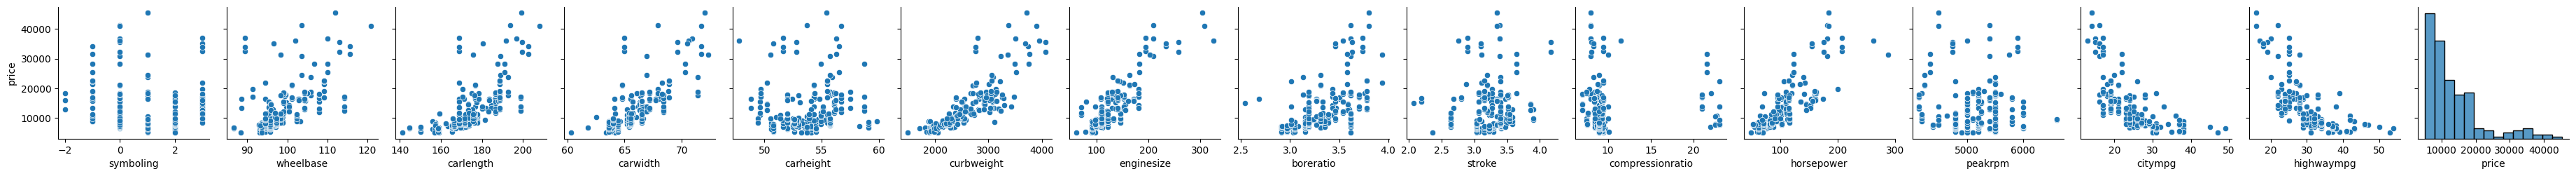

In [3]:
sns.pairplot(data.to_pandas(),y_vars=["price"])

Cutting target col to make it less right Skewed

In [4]:
data=data.filter(data["price"]<data["price"].quantile(0.90))
data.shape

(184, 24)

Check for Linearity between independent variables and dependent variable

Missing Values

In [5]:
data.null_count().sum()

symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


No missing

In [6]:
cat_cols=[col for col in data.columns if data[col].dtype== pl.String]
num_cols=[col for col in data.columns if data[col].dtype!= pl.String]

Removing Outliers using Z scores Anomaly detection

In [7]:
data=compute_z_scores(data,num_cols)
data

symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
i64,str,str,str,str,str,str,f64,f64,f64,f64,i64,str,str,i64,str,f64,f64,f64,i64,i64,i64,i64,f64
3,"""gas""","""std""","""two""","""convertible""","""rwd""","""front""",88.6,168.8,64.1,48.8,2548,"""dohc""","""four""",130,"""mpfi""",3.47,2.68,9.0,111,5000,21,27,13495.0
3,"""gas""","""std""","""two""","""convertible""","""rwd""","""front""",88.6,168.8,64.1,48.8,2548,"""dohc""","""four""",130,"""mpfi""",3.47,2.68,9.0,111,5000,21,27,16500.0
1,"""gas""","""std""","""two""","""hatchback""","""rwd""","""front""",94.5,171.2,65.5,52.4,2823,"""ohcv""","""six""",152,"""mpfi""",2.68,3.47,9.0,154,5000,19,26,16500.0
2,"""gas""","""std""","""four""","""sedan""","""fwd""","""front""",99.8,176.6,66.2,54.3,2337,"""ohc""","""four""",109,"""mpfi""",3.19,3.4,10.0,102,5500,24,30,13950.0
2,"""gas""","""std""","""four""","""sedan""","""4wd""","""front""",99.4,176.6,66.4,54.3,2824,"""ohc""","""five""",136,"""mpfi""",3.19,3.4,8.0,115,5500,18,22,17450.0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
-2,"""gas""","""turbo""","""four""","""sedan""","""rwd""","""front""",104.3,188.8,67.2,56.2,3045,"""ohc""","""four""",130,"""mpfi""",3.62,3.15,7.5,162,5100,17,22,18420.0
-1,"""gas""","""turbo""","""four""","""wagon""","""rwd""","""front""",104.3,188.8,67.2,57.5,3157,"""ohc""","""four""",130,"""mpfi""",3.62,3.15,7.5,162,5100,17,22,18950.0
-1,"""gas""","""std""","""four""","""sedan""","""rwd""","""front""",109.1,188.8,68.9,55.5,2952,"""ohc""","""four""",141,"""mpfi""",3.78,3.15,9.5,114,5400,23,28,16845.0


25% of rows dropped

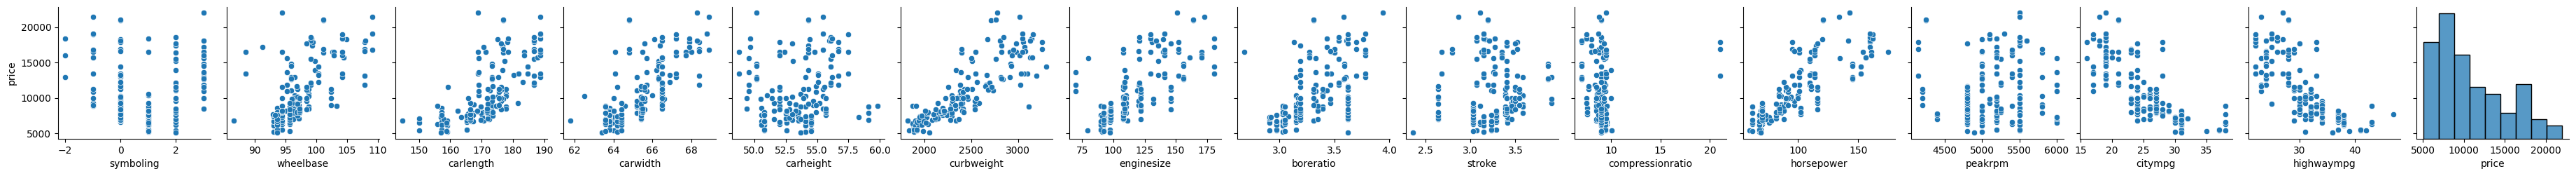

In [8]:
sns.pairplot(data.to_pandas(), y_vars=["price"])

# Categorical EDA

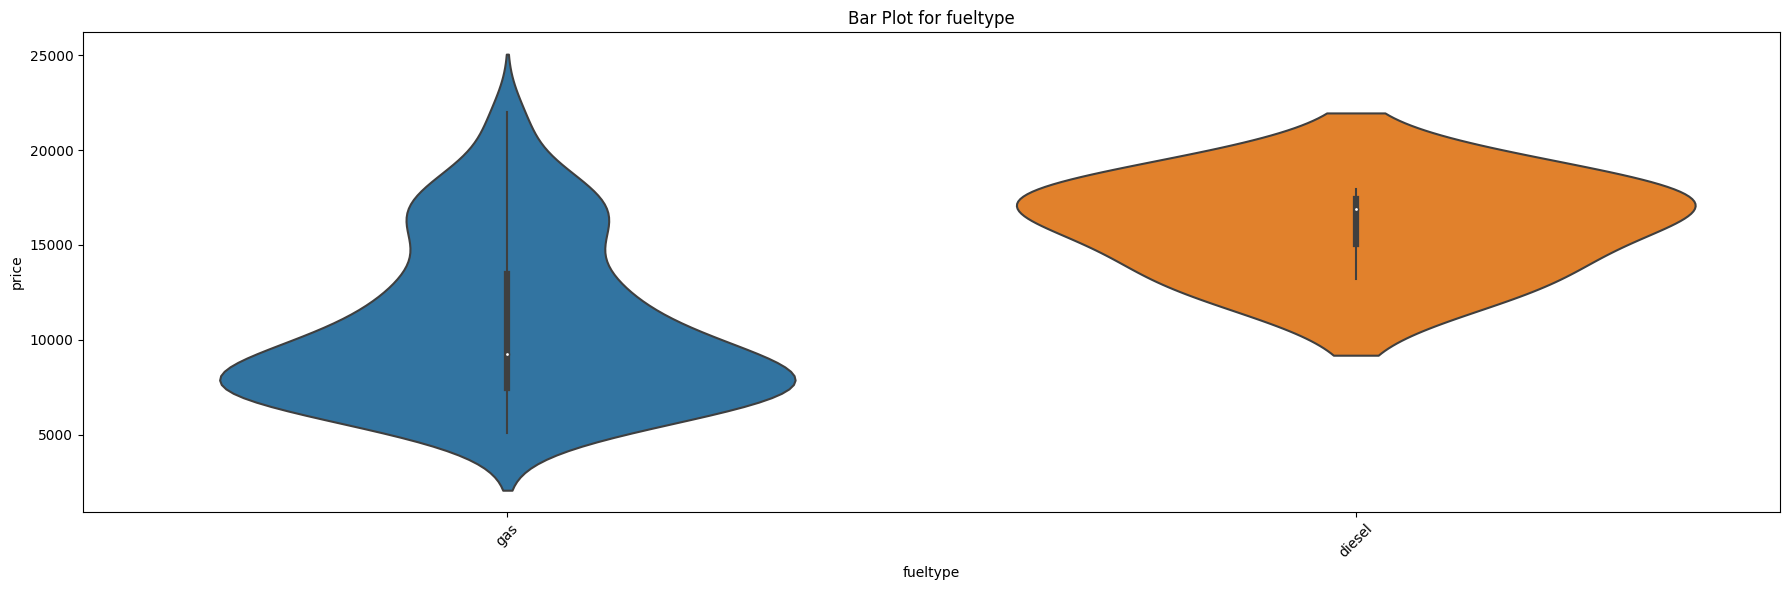

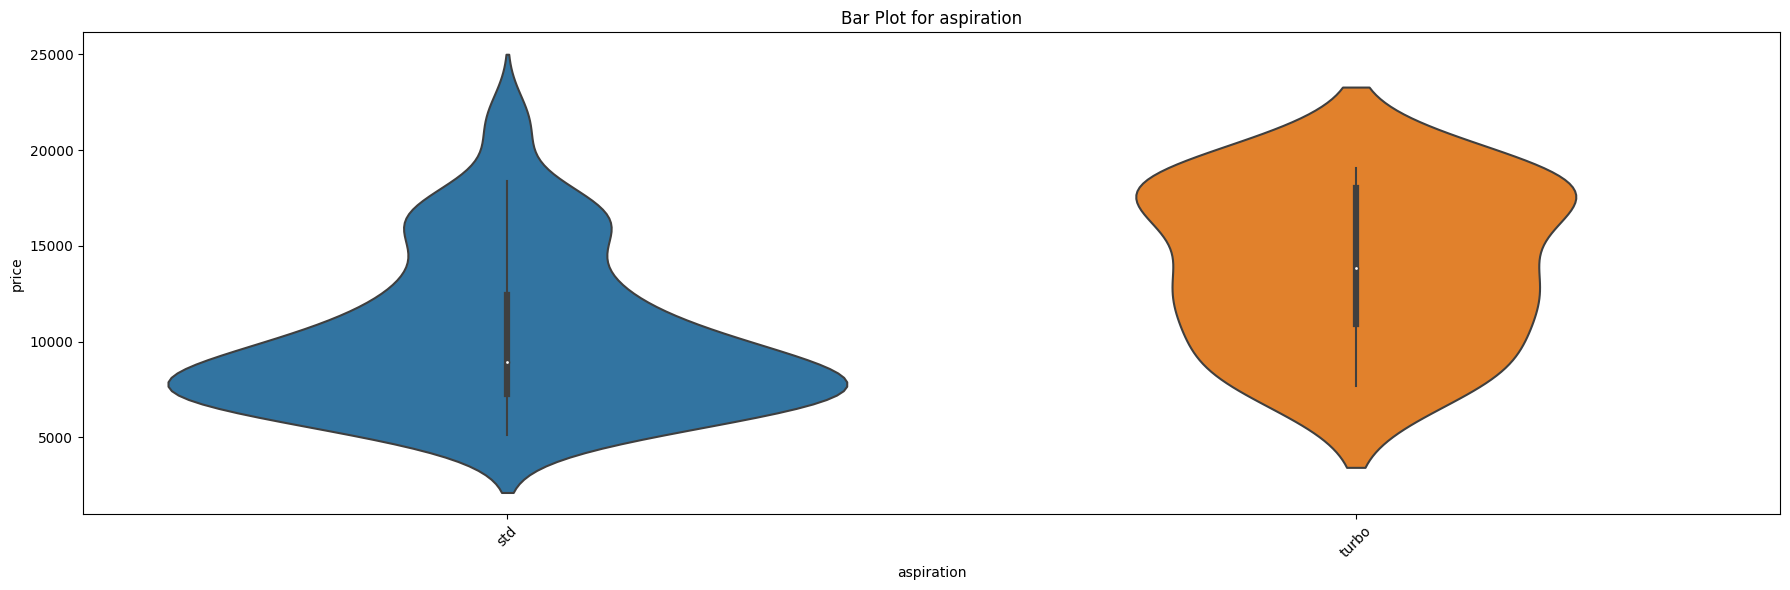

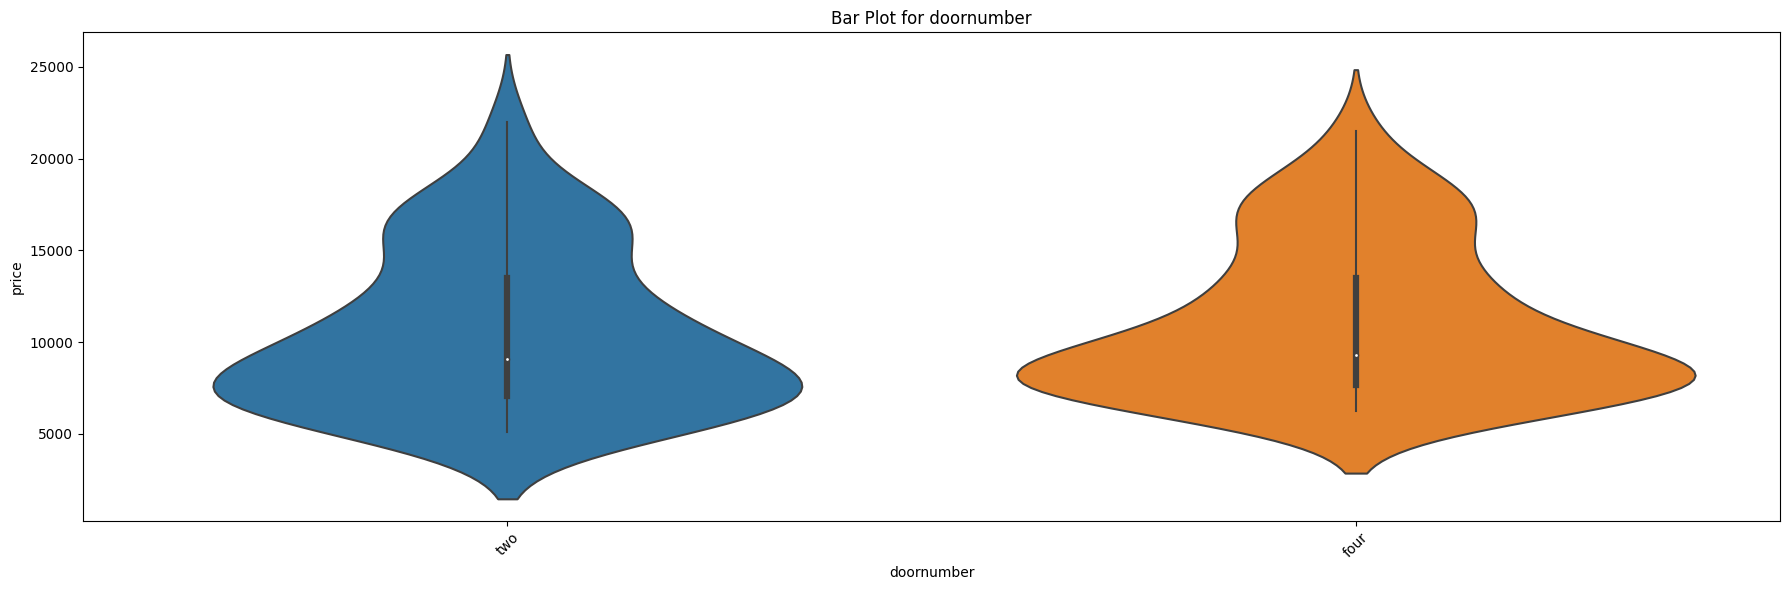

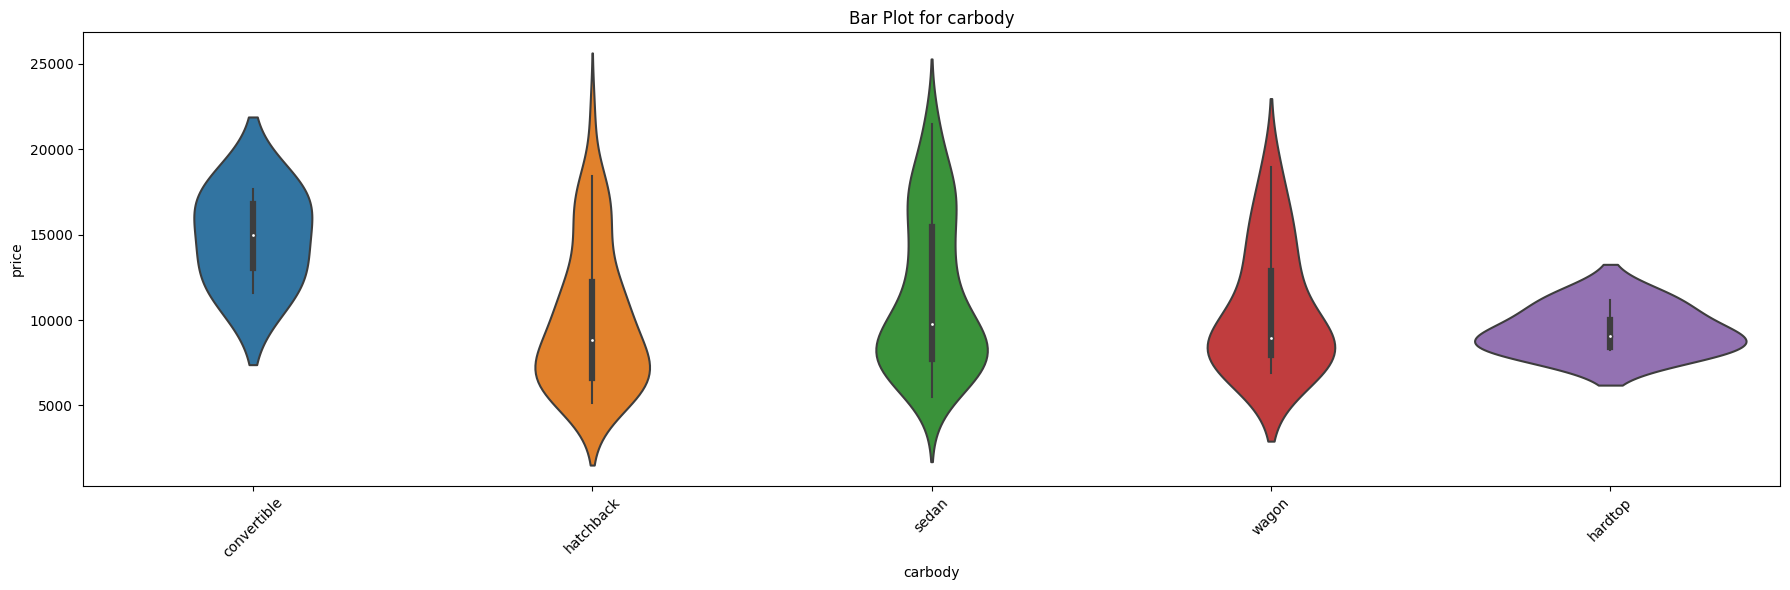

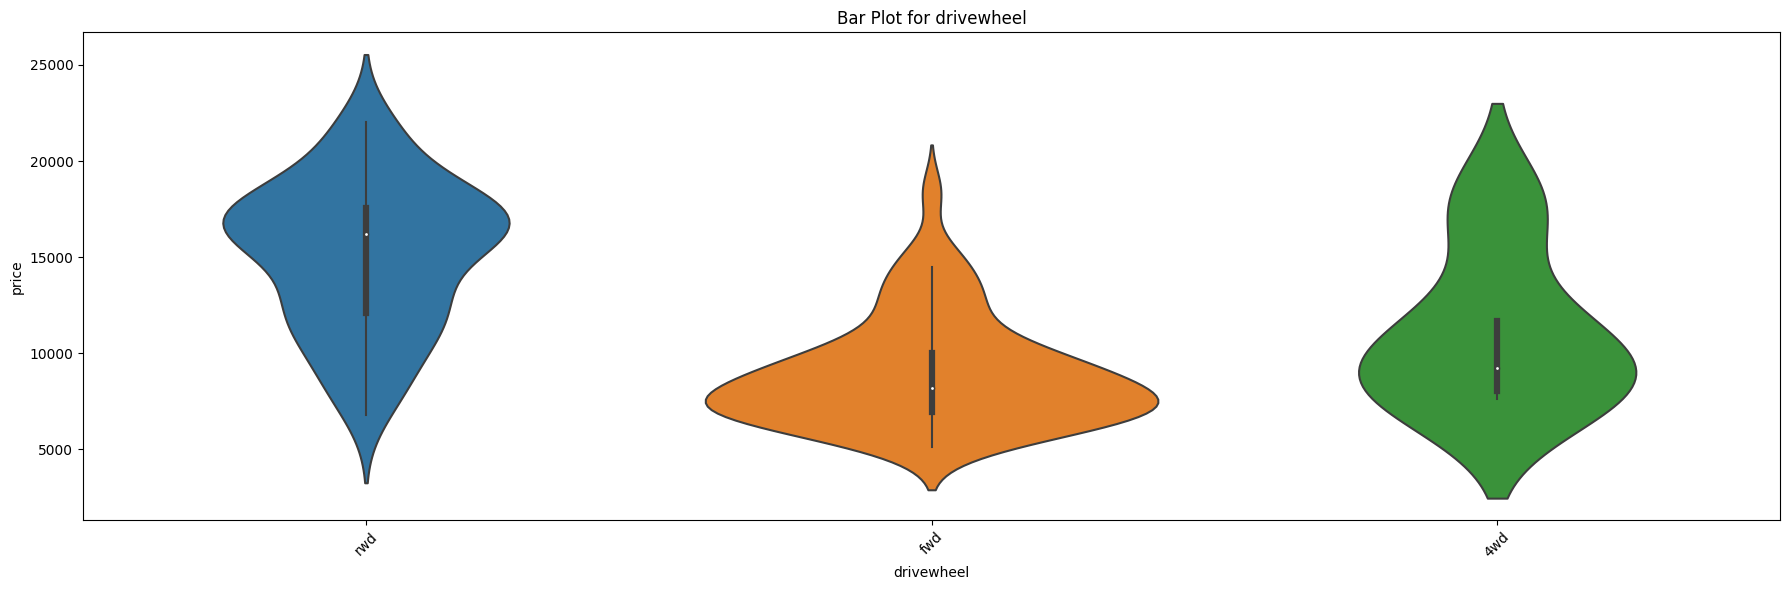

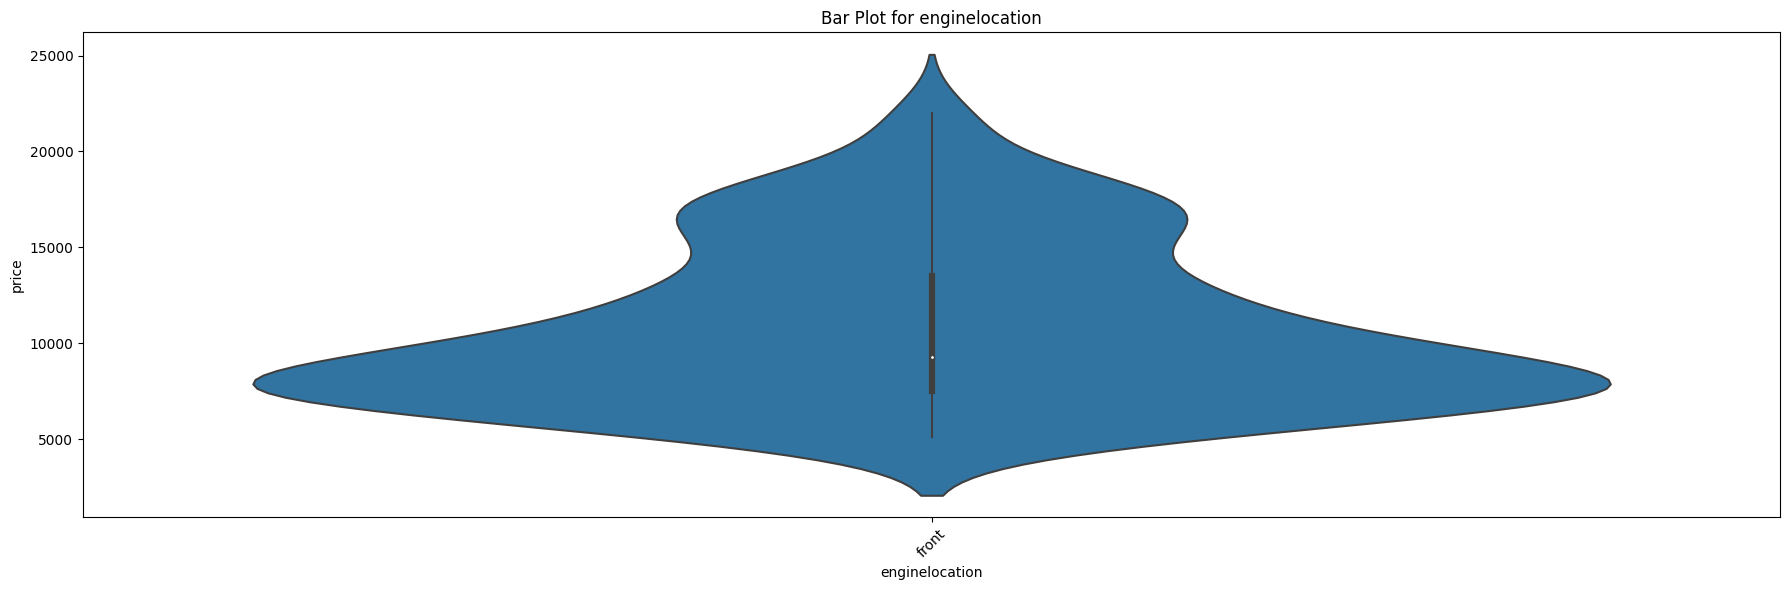

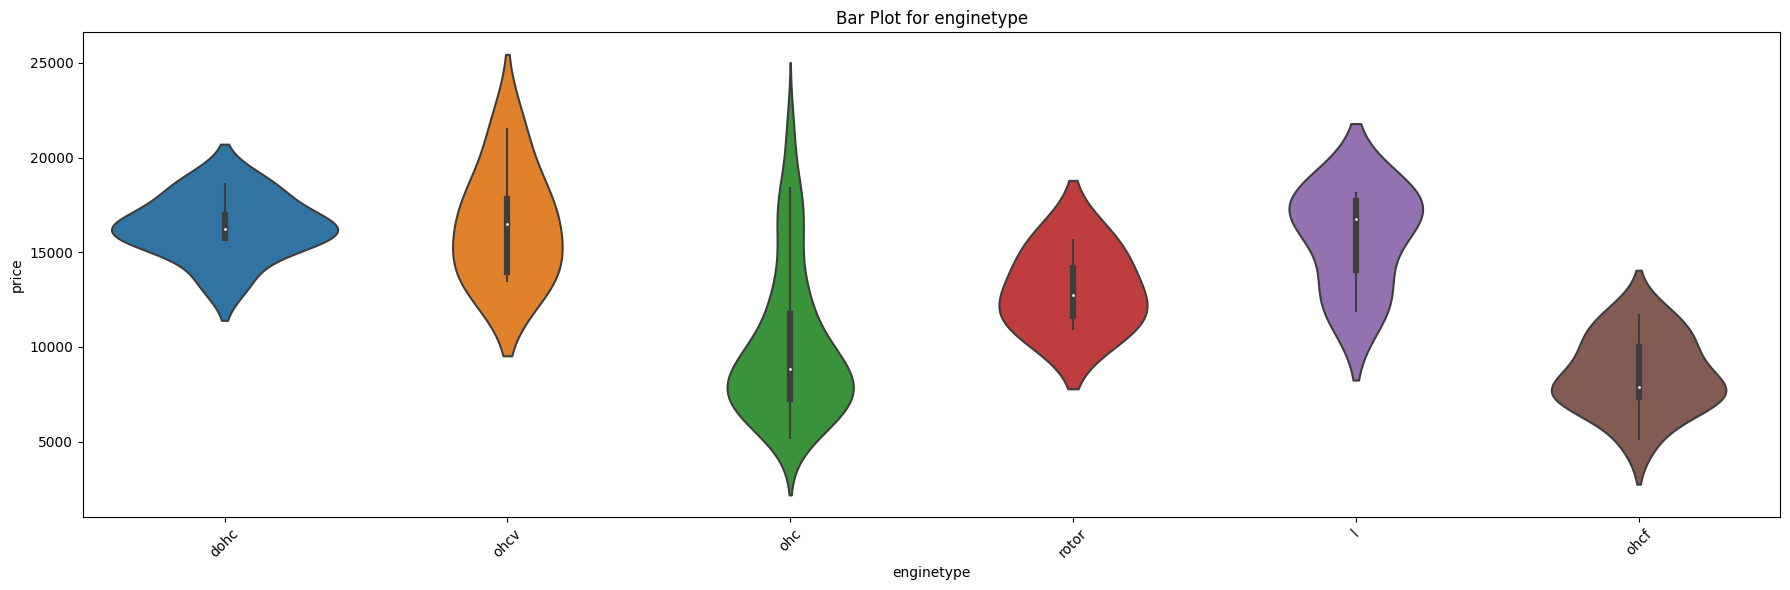

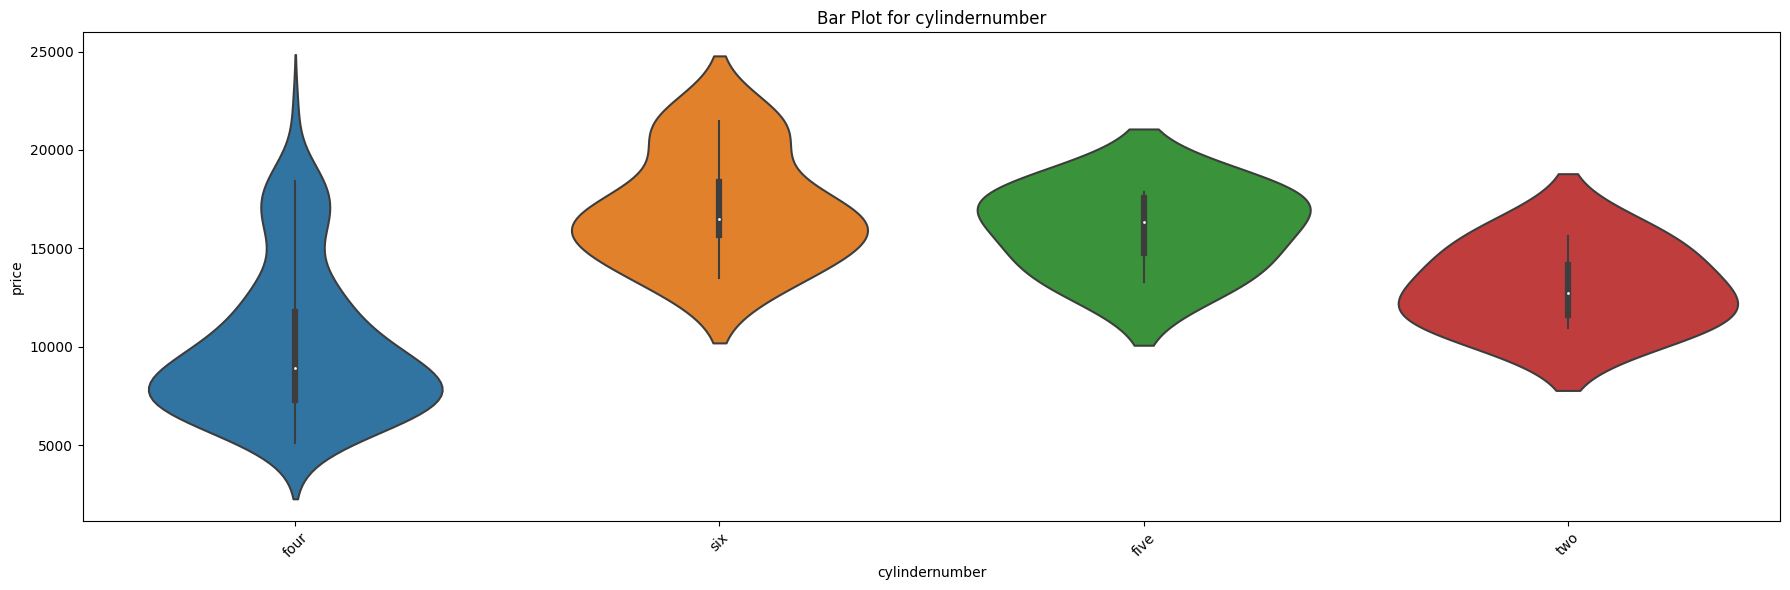

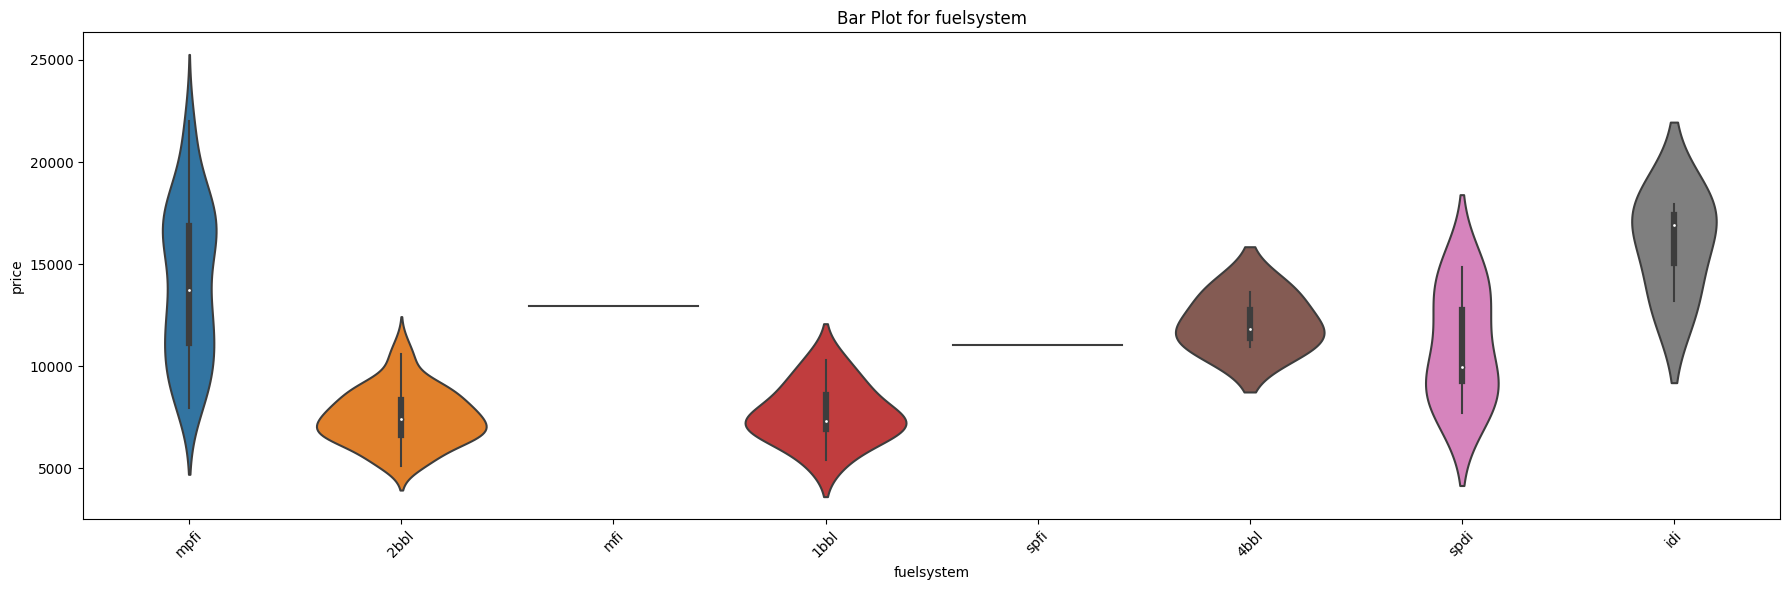

In [9]:
categorical_violin_plot(data.to_pandas(),cat_cols,"price")

In [10]:
for i in ["fueltype","aspiration","doornumber"]:
    print(data[i].value_counts())

shape: (2, 2)
┌──────────┬───────┐
│ fueltype ┆ count │
│ ---      ┆ ---   │
│ str      ┆ u32   │
╞══════════╪═══════╡
│ gas      ┆ 157   │
│ diesel   ┆ 3     │
└──────────┴───────┘
shape: (2, 2)
┌────────────┬───────┐
│ aspiration ┆ count │
│ ---        ┆ ---   │
│ str        ┆ u32   │
╞════════════╪═══════╡
│ std        ┆ 136   │
│ turbo      ┆ 24    │
└────────────┴───────┘
shape: (2, 2)
┌────────────┬───────┐
│ doornumber ┆ count │
│ ---        ┆ ---   │
│ str        ┆ u32   │
╞════════════╪═══════╡
│ four       ┆ 87    │
│ two        ┆ 73    │
└────────────┴───────┘


In [11]:
perform_ttest(data, "fueltype", "gas", "diesel","price")
perform_ttest(data, "aspiration", "std", "turbo","price")
perform_ttest(data, "doornumber", "two", "four","price")

T-statistic: -3.5781389535990473
P-value: 0.059923597072154416
There is no significant difference in price between gas and diesel for column 'fueltype'.
T-statistic: -4.195414550224035
P-value: 0.00020561636492323368
There is a significant difference in price between std and turbo for column 'aspiration'.
T-statistic: -0.8326777259466529
P-value: 0.4063464060935148
There is no significant difference in price between two and four for column 'doornumber'.


Dropping Doornumber,engineLocation

In [12]:
data=data.drop("doornumber")
data=data.drop("enginelocation")
cat_cols.remove("doornumber")
cat_cols.remove("enginelocation")

Performing Kruskal-Walli test as data not following normal distribution

In [13]:
perform_non_normal_kruskal_hypothesis(data,cat_cols)


Kruskal-Wallis H-statistic: 4.282281121904253
P-value: 0.038511630373378236
There is a significant difference in prices between different fueltype categories.
Kruskal-Wallis H-statistic: 16.479380945142452
P-value: 4.918204028297804e-05
There is a significant difference in prices between different aspiration categories.
Kruskal-Wallis H-statistic: 8.996849151012182
P-value: 0.06117828546325124
There is no significant difference in prices between different carbody categories.
Kruskal-Wallis H-statistic: 60.21888289908011
P-value: 8.387561649012382e-14
There is a significant difference in prices between different drivewheel categories.
Kruskal-Wallis H-statistic: 38.48323507933817
P-value: 3.0171337169553276e-07
There is a significant difference in prices between different enginetype categories.
Kruskal-Wallis H-statistic: 31.975007490483318
P-value: 5.29732433855905e-07
There is a significant difference in prices between different cylindernumber categories.
Kruskal-Wallis H-statistic: 1

Significant enough to reject NULL Hypothesis of No impact of change to dependent variable

In [14]:
data=data.with_columns(data["cylindernumber"].str.replace_many(["two","three","four","five","six","eight","twelve"],["2","3","4","5","6","8","12"]).cast(pl.Int64))
data=data.with_columns(data["fuelsystem"].is_in(["mpfi","idi"]).cast(pl.Int64))
data=data.with_columns(data["fueltype"].is_in(["diesel"]).cast(pl.Int64))
data=data.with_columns(data["enginetype"].is_in(["ohc","ohcf"]).cast(pl.Int64))
cat_cols.remove("cylindernumber")
cat_cols.remove("fuelsystem")
cat_cols.remove("enginetype")
cat_cols.remove("fueltype")
num_cols.append("fueltype")
num_cols.append("cylindernumber")
num_cols.append("enginetype")
num_cols.append("fuelsystem")

In [15]:
for i in cat_cols:
    print(data[i].value_counts())

shape: (2, 2)
┌────────────┬───────┐
│ aspiration ┆ count │
│ ---        ┆ ---   │
│ str        ┆ u32   │
╞════════════╪═══════╡
│ std        ┆ 136   │
│ turbo      ┆ 24    │
└────────────┴───────┘
shape: (5, 2)
┌─────────────┬───────┐
│ carbody     ┆ count │
│ ---         ┆ ---   │
│ str         ┆ u32   │
╞═════════════╪═══════╡
│ convertible ┆ 4     │
│ sedan       ┆ 70    │
│ hardtop     ┆ 4     │
│ wagon       ┆ 19    │
│ hatchback   ┆ 63    │
└─────────────┴───────┘
shape: (3, 2)
┌────────────┬───────┐
│ drivewheel ┆ count │
│ ---        ┆ ---   │
│ str        ┆ u32   │
╞════════════╪═══════╡
│ rwd        ┆ 46    │
│ fwd        ┆ 105   │
│ 4wd        ┆ 9     │
└────────────┴───────┘


One hot encoding remaining categorical Variables

# Numerical eda

In [16]:
data[num_cols]

symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueltype,cylindernumber,enginetype,fuelsystem
i64,f64,f64,f64,f64,i64,i64,f64,f64,f64,i64,i64,i64,i64,f64,i64,i64,i64,i64
3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,0,4,0,1
3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,0,4,0,1
1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,0,6,0,1
2,99.8,176.6,66.2,54.3,2337,109,3.19,3.4,10.0,102,5500,24,30,13950.0,0,4,1,1
2,99.4,176.6,66.4,54.3,2824,136,3.19,3.4,8.0,115,5500,18,22,17450.0,0,5,1,1
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
-2,104.3,188.8,67.2,56.2,3045,130,3.62,3.15,7.5,162,5100,17,22,18420.0,0,4,1,1
-1,104.3,188.8,67.2,57.5,3157,130,3.62,3.15,7.5,162,5100,17,22,18950.0,0,4,1,1
-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0,0,4,1,1


Univariate Analysis

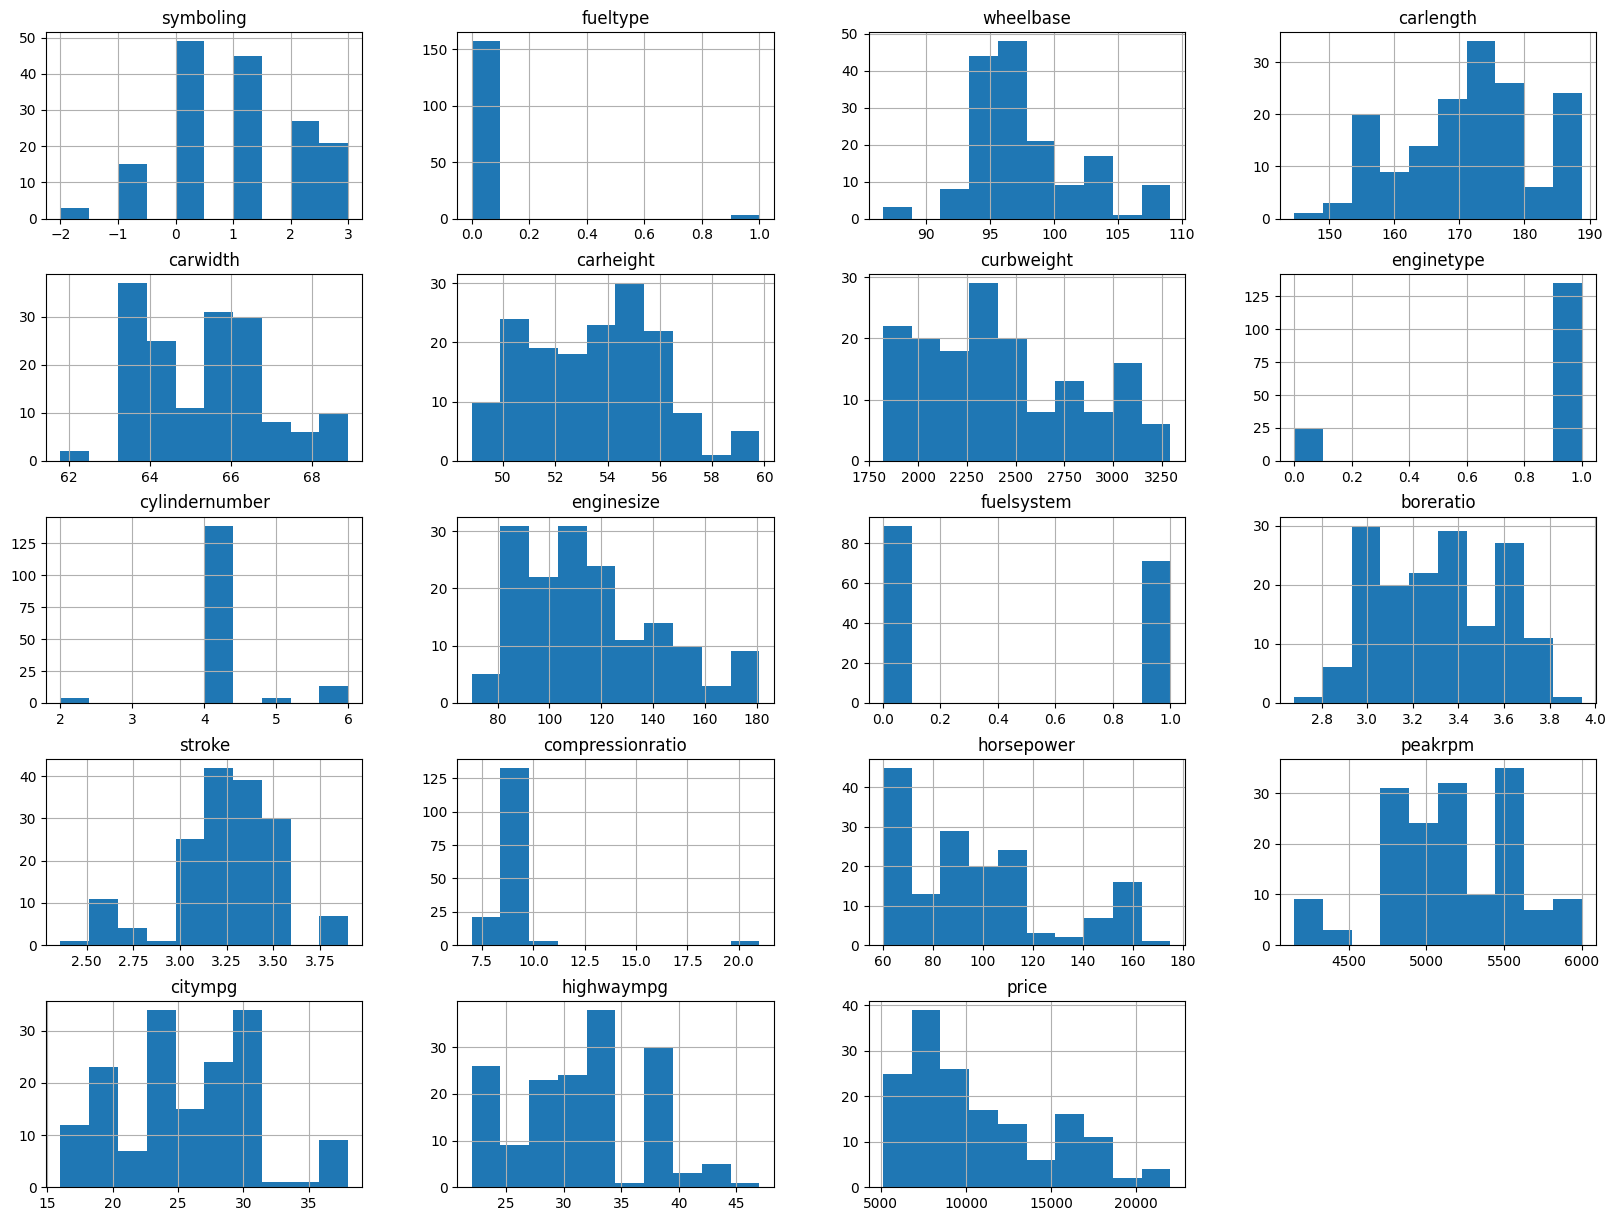

In [17]:
data.to_pandas().hist(bins=10,figsize=(20,15))
plt.show()

Bivariate Analysis

<AxesSubplot: >

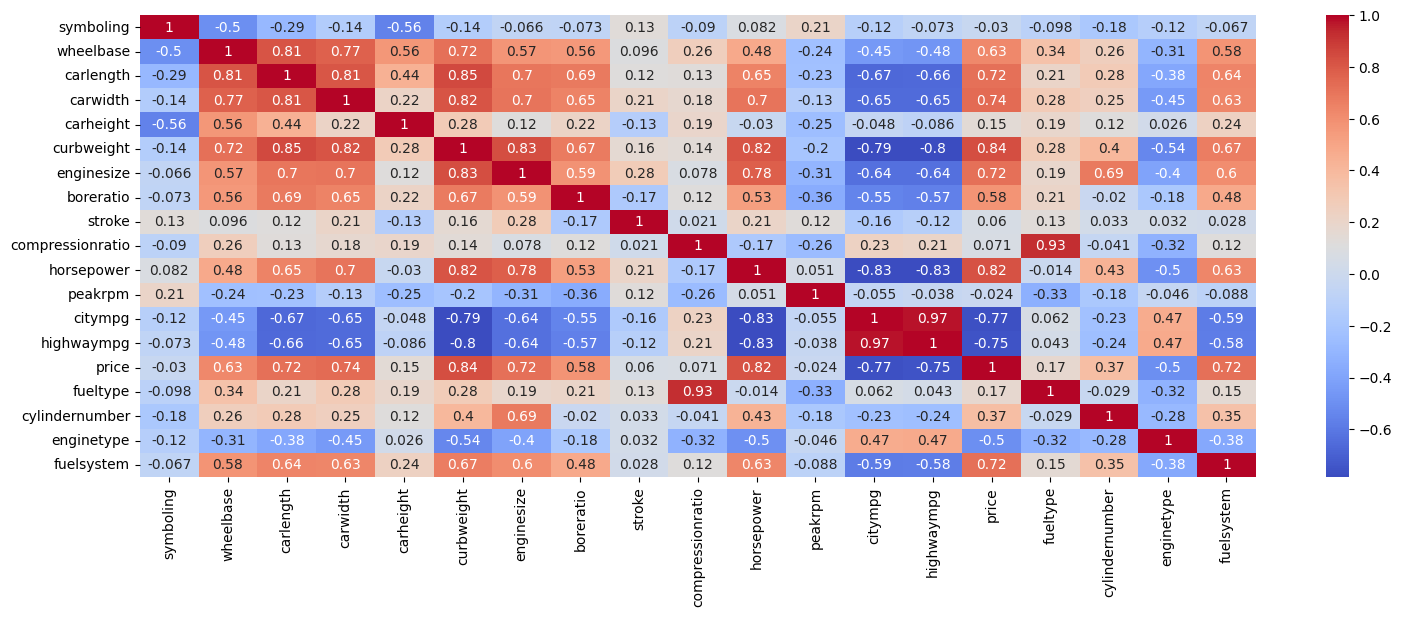

In [18]:
plt.figure(figsize=(18,6))
sns.heatmap(data[num_cols].to_pandas().corr(),annot=True,cmap="coolwarm",robust=True)

Feature Engineering

In [19]:
data=data.with_columns(((data["highwaympg"]+data["citympg"])/2).alias("averagempg")).drop(["highwaympg","citympg"])
num_cols.remove("citympg")
num_cols.remove("highwaympg")
num_cols.append("averagempg")

In [20]:
cols=['wheelbase', 'carlength', 'carwidth','curbweight', 'enginesize', 'boreratio', 'horsepower', 'price', 'fuelsystem', 'averagempg']
drop=[col for col in num_cols if col not in cols]
num_cols=cols

In [21]:
data=data.drop(drop)
data

aspiration,carbody,drivewheel,wheelbase,carlength,carwidth,curbweight,enginesize,fuelsystem,boreratio,horsepower,price,averagempg
str,str,str,f64,f64,f64,i64,i64,i64,f64,i64,f64,f64
"""std""","""convertible""","""rwd""",88.6,168.8,64.1,2548,130,1,3.47,111,13495.0,24.0
"""std""","""convertible""","""rwd""",88.6,168.8,64.1,2548,130,1,3.47,111,16500.0,24.0
"""std""","""hatchback""","""rwd""",94.5,171.2,65.5,2823,152,1,2.68,154,16500.0,22.5
"""std""","""sedan""","""fwd""",99.8,176.6,66.2,2337,109,1,3.19,102,13950.0,27.0
"""std""","""sedan""","""4wd""",99.4,176.6,66.4,2824,136,1,3.19,115,17450.0,20.0
…,…,…,…,…,…,…,…,…,…,…,…,…
"""turbo""","""sedan""","""rwd""",104.3,188.8,67.2,3045,130,1,3.62,162,18420.0,19.5
"""turbo""","""wagon""","""rwd""",104.3,188.8,67.2,3157,130,1,3.62,162,18950.0,19.5
"""std""","""sedan""","""rwd""",109.1,188.8,68.9,2952,141,1,3.78,114,16845.0,25.5


In [22]:
data["drivewheel"].value_counts()

drivewheel,count
str,u32
"""fwd""",105
"""4wd""",9
"""rwd""",46


In [23]:
data=data.to_dummies(columns=cat_cols).drop(["aspiration_turbo","carbody_convertible","drivewheel_4wd"])
data.write_csv("../Day2/processed.csv")

## Performing OverSample Since Some Categorical variables are very low to split or cv

In [24]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression

df=data.sample(10000,with_replacement=True)
lr=LinearRegression()

cv_results = cross_validate(lr, df.drop("price"),df["price"], cv=10, scoring='r2', return_train_score=True)
print(f'Test Scores: {cv_results["test_score"]}')
print(f'Training Scores: {cv_results["train_score"]}')
print(f'Mean Test Score: {cv_results["test_score"].mean()}')
print(f'Standard Deviation of Test Scores: {cv_results["test_score"].std()}')
print(f'Mean Fit Time: {cv_results["fit_time"].mean()}')
print(f'Mean Score Time: {cv_results["score_time"].mean()}')

Test Scores: [0.84373372 0.82649926 0.84603438 0.84723346 0.84724553 0.8408701
 0.83481854 0.8392492  0.84378246 0.83766512]
Training Scores: [0.84120407 0.84317003 0.84101983 0.84089937 0.84082944 0.84159228
 0.84223776 0.84177519 0.84126358 0.84194438]
Mean Test Score: 0.8407131774386988
Standard Deviation of Test Scores: 0.006166731137869677
Mean Fit Time: 0.004645156860351563
Mean Score Time: 0.0008203744888305664


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

def get_metrics(X,y_true,y_pred):
    r2 = r2_score(y_true,y_pred)
    adjusted_r2 = 1 - (1-r2)*(len(y_true)-1)/(len(y_true)-X.shape[1]-1)
    return r2,adjusted_r2

X_train,X_test,y_train,y_test = train_test_split(df.drop("price"),df["price"],test_size=0.2)
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
get_metrics(X_test,y_test,y_pred)

(0.8415893955285465, 0.8403112464253981)

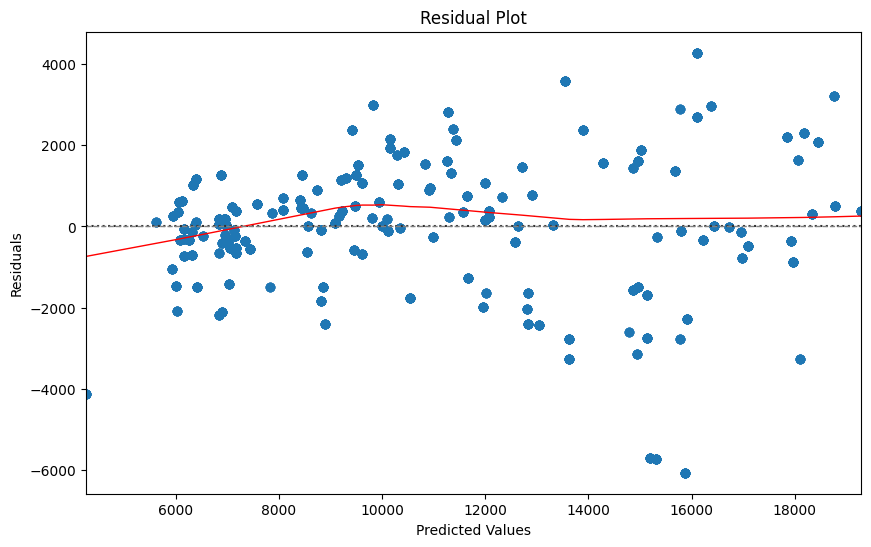

In [26]:
plt.figure(figsize=(10, 6))
residuals=y_pred-y_test
sns.residplot(x=y_pred, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(0, color='grey', linestyle='dashed', linewidth=1)
plt.show()

### HeteroSkedasticity Not Following little bit

<AxesSubplot: ylabel='Count'>

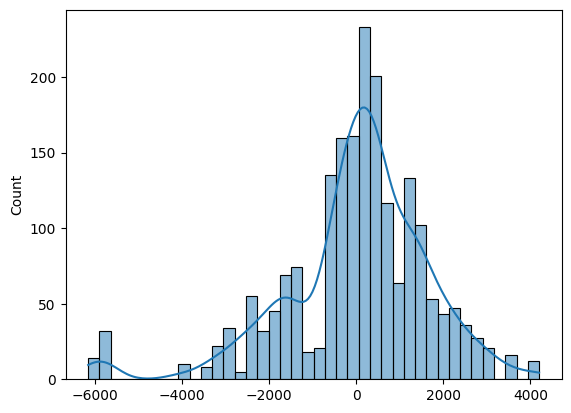

In [27]:
sns.histplot(residuals,kde=True)

<Figure size 1000x600 with 0 Axes>

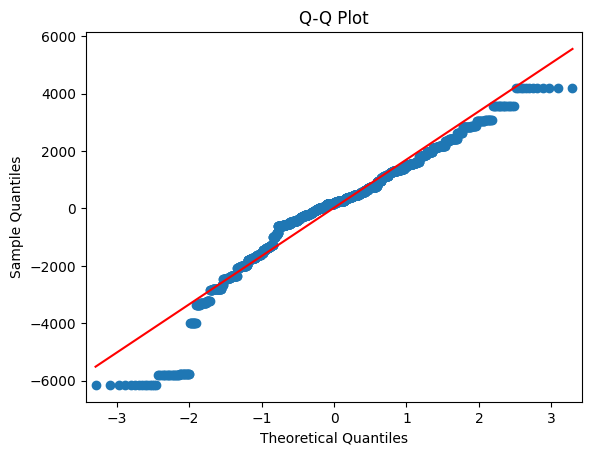

In [28]:
import statsmodels.api as sm
# Q-Q plot
plt.figure(figsize=(10, 6))
sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot')
plt.show()

# Residual deviating from normal at tails